# PCA dynamics

TODO : do PCA on the N-dim space and see the 2d rank

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl, matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy import stats
from neurodyn import *

## Recover overlaps from 3D dynamics

Scatter the neurons in the $(\xi_i^0, \xi_i^1, \phi(h_i))$ space, then do PCA (with one component) to find the principal vector in the direction of change (in 3D).

Then we project the 3D vector into the 2D space $(\xi_i^0, \xi_i^1)$, and compare that to the overlaps

In [54]:
def pca_trajectory(rnn: LowRankRNN, res: Result, random_state: int = 42) -> np.ndarray:
	pca_components = []

	for idt in range(len(res.t)):
		activity = rnn.phi(res.h[:, idt])
		embedding = np.vstack((rnn.F[:, 0], rnn.F[:, 1], activity)).T
		pca = PCA(n_components=1, random_state=random_state)
		pca.fit(embedding)
		pca_components.append(pca.components_)

	return np.vstack(pca_components)

def plot_overlap_and_pca_trajectory(rnn: LowRankRNN, res: Result):
	pca_components = pca_trajectory(rnn, res)

	fig, ax = plt.subplots(nrows=2, layout='constrained', sharex=True)

	plot_overlap_trajectory(rnn, res, figax=(fig, ax[0]))

	pca_components_2d = pca_components[:, [0,1]].copy()
	pca_components_2d /= np.linalg.norm(pca_components_2d, axis=1)[:, None]  # renormalize
	ax[1].plot(res.t, pca_components_2d[:, 0], '--', label='PCA $\\mu=0$')
	ax[1].plot(res.t, pca_components_2d[:, 1], '--', label='PCA $\\mu=1$')
	ax[1].plot(res.t, pca_components[:, 2], '--', label='PCA activity component')
	ax[1].set_ylabel('PCA components')
	ax[1].set_title('PCA trajectory')
	ax[1].legend()
	ax[1].set_xlabel(ax[0].get_xlabel())
	ax[1].grid(axis='y')
	ax[0].label_outer()

	plt.show()

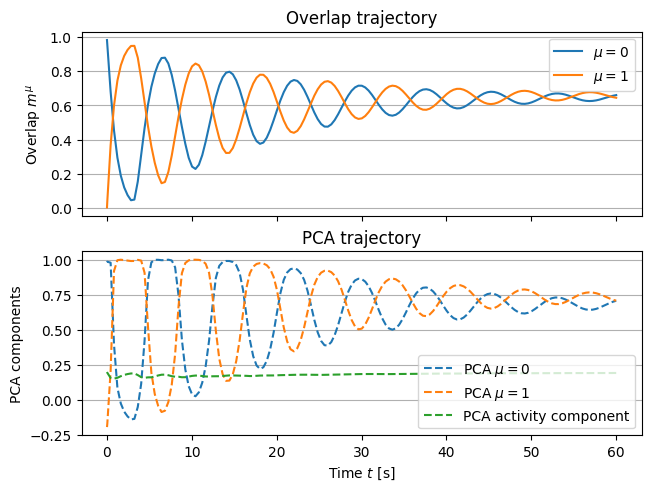

In [56]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True, delta=3, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 60), dt_max=0.4, progress=True, cache=True)
plot_overlap_and_pca_trajectory(rnn, res)

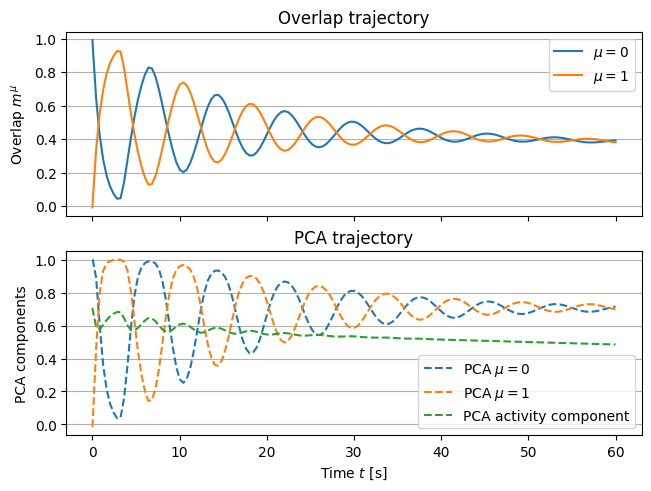

In [59]:
rnn = LowRankCyclingRNN.new_valentin(p=2, N=20_000, phi=identity, I_ext=zero, exclude_self_connections=True, delta=3, shift=1)
res = rnn.simulate(rnn.F[:, 0], (0, 60), dt_max=0.4, progress=True, cache=True)
plot_overlap_and_pca_trajectory(rnn, res)